In [1]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation_aux import ASAPP
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

import joblib

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet()
dl.config = args
dl.initialize_path()
df.initialize_data()
print(dl.inpath)
print(dl.outpath)



/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/pbmc/pbmc
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/pbmc/pbmc


FileNotFoundError: [Errno 2] No such file or directory: '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/pbmc/pbmc_X.csv.gz'

In [4]:
avb = joblib.load(dl.outpath+'_model_avb.pkl')
amvb = joblib.load(dl.outpath+'_model_amvb.pkl')
vb = joblib.load(dl.outpath+'_model_vb.pkl')
mvb = joblib.load(dl.outpath+'_model_mvb.pkl')

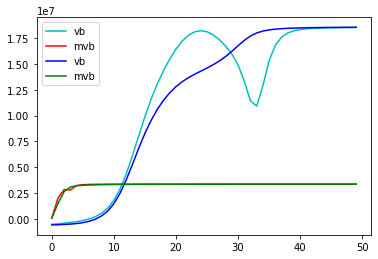

In [5]:
plt.plot(avb.bound,'c',label='vb')
plt.plot(amvb.bound,'r',label='mvb')
plt.plot(vb.bound,'b',label='vb')
plt.plot(mvb.bound,'g',label='mvb')
plt.legend()

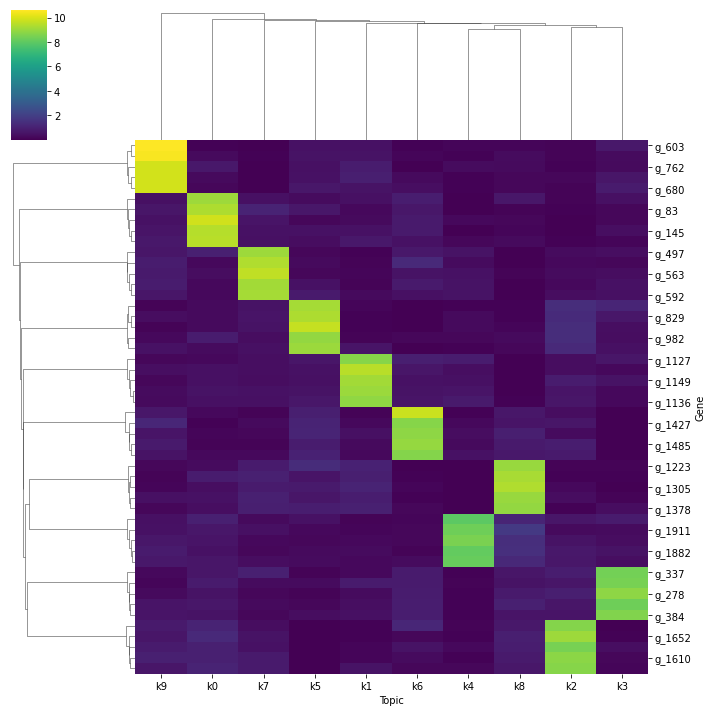

In [6]:
df_beta = pd.DataFrame(avb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

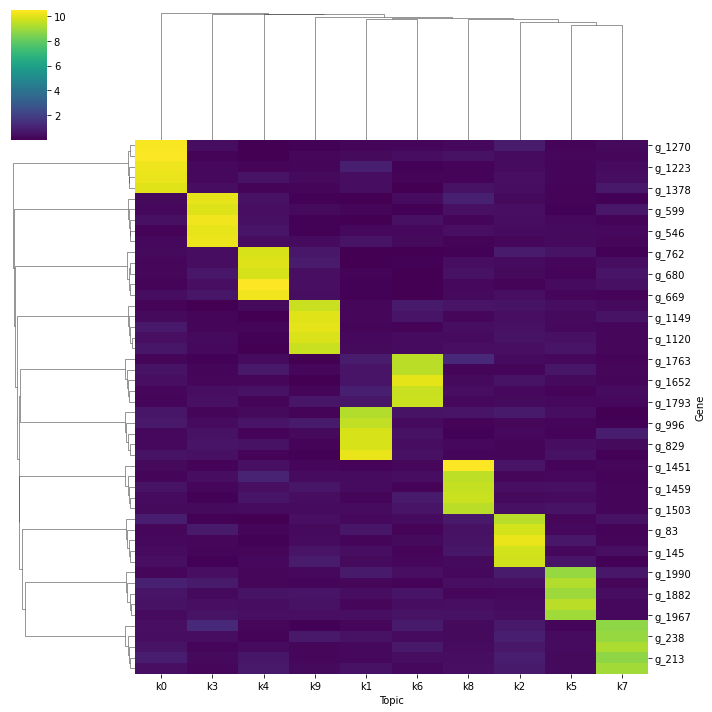

In [7]:
df_beta = pd.DataFrame(amvb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

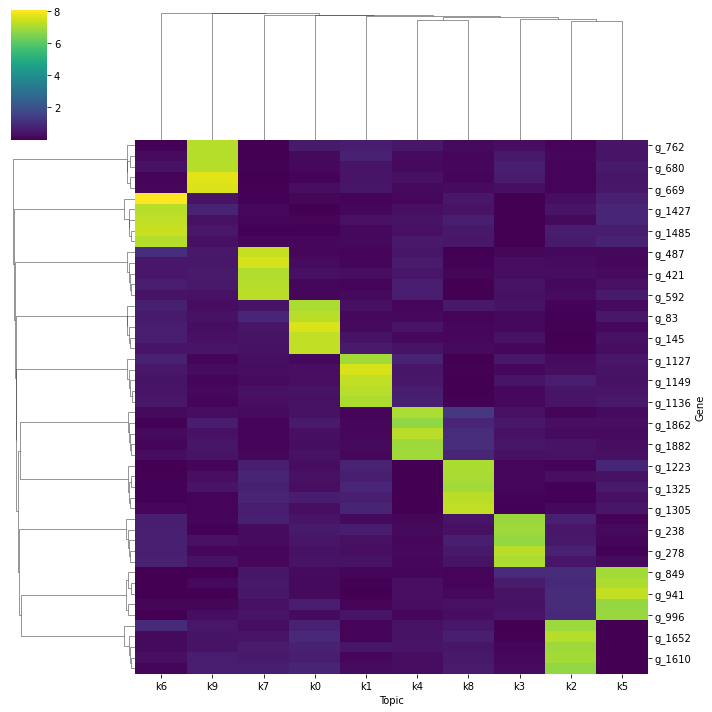

In [8]:
df_beta = pd.DataFrame(vb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

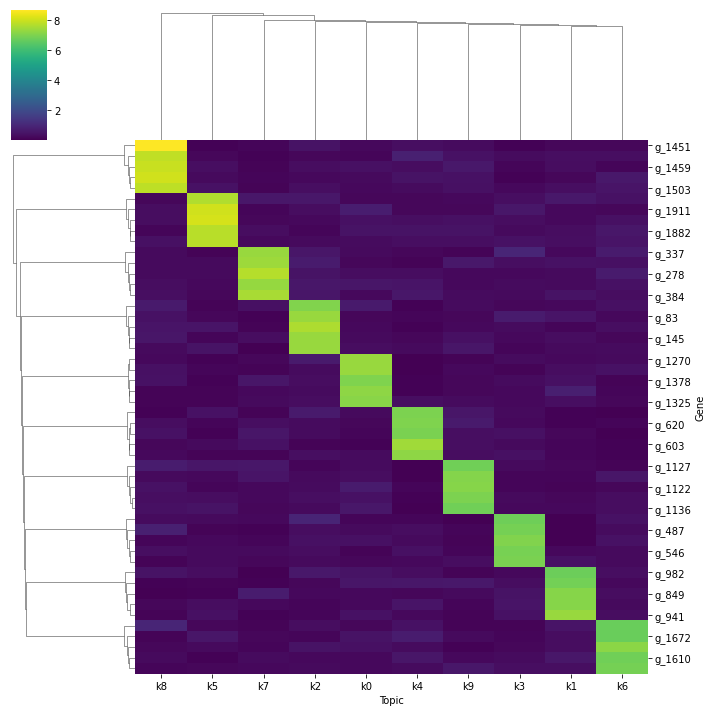

In [9]:
df_beta = pd.DataFrame(mvb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [10]:
avb = joblib.load(dl.outpath+'_model_avb.pkl')
amvb = joblib.load(dl.outpath+'_model_amvb.pkl')
vb = joblib.load(dl.outpath+'_model_vb.pkl')
mvb = joblib.load(dl.outpath+'_model_mvb.pkl')

with QR basis

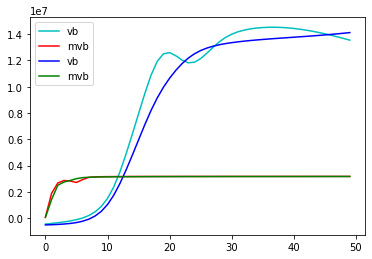

In [11]:
plt.plot(avb.bound,'c',label='vb')
plt.plot(amvb.bound,'r',label='mvb')
plt.plot(vb.bound,'b',label='vb')
plt.plot(mvb.bound,'g',label='mvb')
plt.legend()

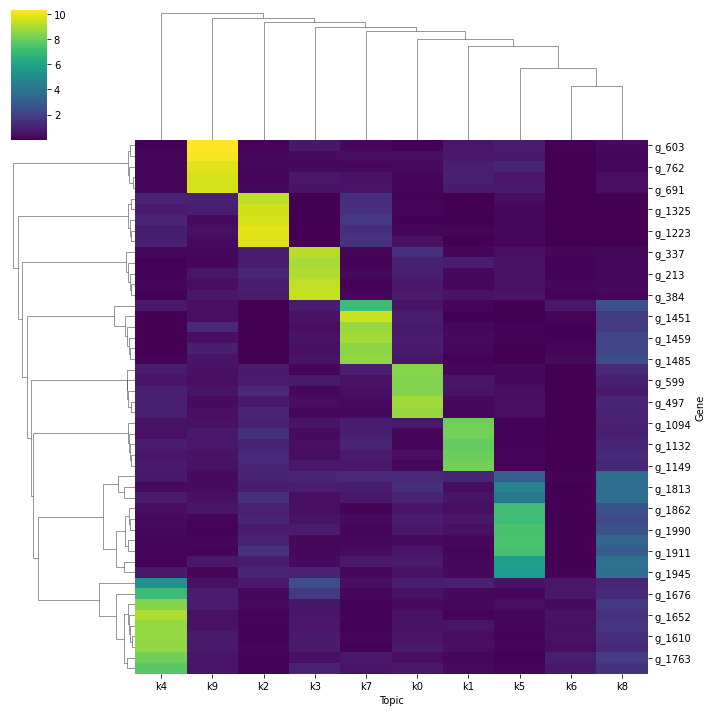

In [12]:
df_beta = pd.DataFrame(avb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

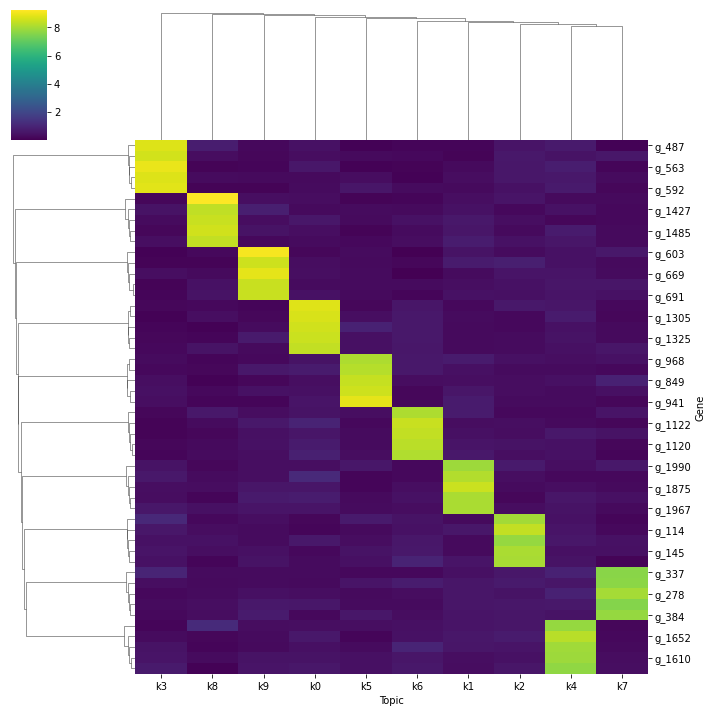

In [13]:
df_beta = pd.DataFrame(amvb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

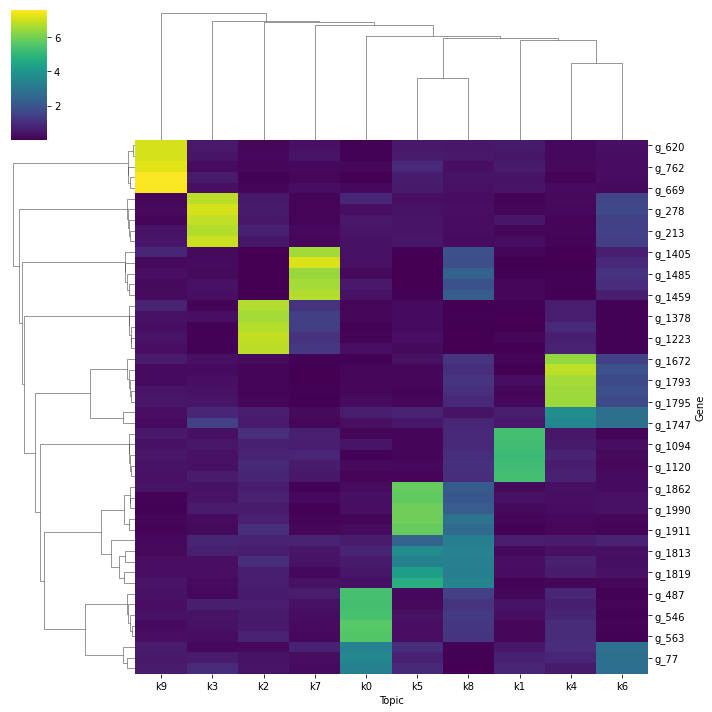

In [14]:
df_beta = pd.DataFrame(vb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

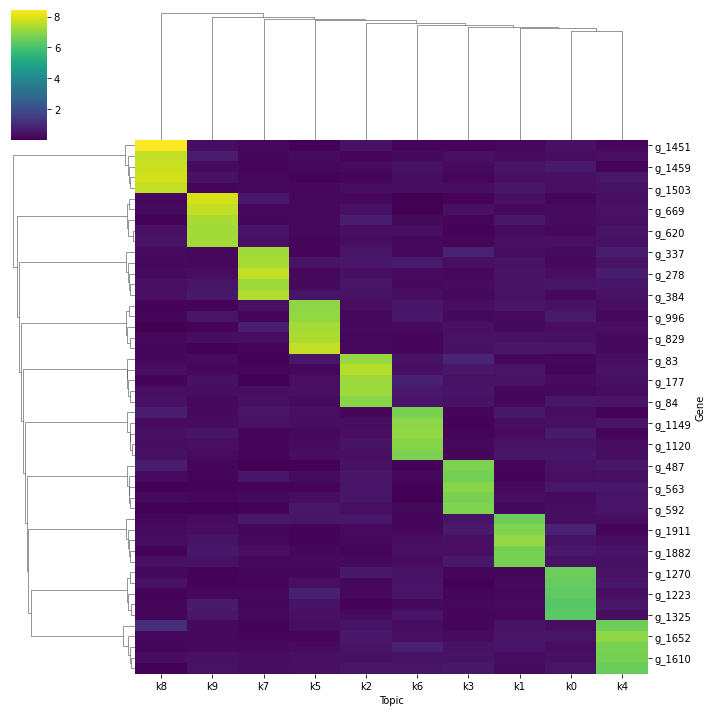

In [15]:
df_beta = pd.DataFrame(mvb.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')